Dataset: Wine Quality
https://archive.ics.uci.edu/dataset/186/wine+quality

We will be using the wine quality of red wine

1.1 Dataset Overview

The Wine Quality dataset contains physicochemical measurements of Portuguese “Vinho Verde” wines, along with quality ratings assigned by trained sensory experts. The goal of the original study was to model wine quality based on chemical attributes and to support decision-making in wine classification and quality control.

The data were collected by researchers from the University of Minho and published as part of a 2009 study on wine quality prediction using machine learning methods (Cortez et al., 2009). The dataset is hosted by the UCI Machine Learning Repository, which is the official data source.

Citation of source:
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553.
Dataset source: UCI Machine Learning Repository — https://archive.ics.uci.edu/dataset/186/wine+quality

In [2]:
import pandas as pd

df = pd.read_csv("winequality-red.csv", sep=";")

df.shape

(1599, 12)

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There are 1599 observations (rows) and 12 variables (columns)

Numerical Variables (quantitative): fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

Categorical Variables (qualitative): quality

This is an observational study as the researchers did not manipulate treatments or control experimental conditions.

1.2 Summary Statistics

In [ ]:
#Numerical 

import numpy as np
from scipy import stats

def summarize_variable(series):
    
    mean_val = series.mean()
    median_val = series.median()
    mode_val = series.mode().iloc[0]   
    
    min_val = series.min()
    max_val = series.max()
    data_range = (min_val, max_val)
    
    variance_val = series.var()
    std_val = series.std()
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    return {
        "mean": mean_val,
        "median": median_val,
        "mode": mode_val,
        "range": data_range,
        "variance": variance_val,
        "std_dev": std_val,
        "iqr": iqr,
        "Q1": q1,
        "Q3": q3
    }

variables_to_summarize = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

for var in variables_to_summarize:
    stats_dict = summarize_variable(df[var])
    print(f"\nSummary for {var}:")
    for k, v in stats_dict.items():
        print(f"  {k}: {v}")


Summary for fixed acidity:
  mean: 8.31963727329581
  median: 7.9
  mode: 7.2
  range: (np.float64(4.6), np.float64(15.9))
  variance: 3.0314163889978167
  std_dev: 1.7410963181276953
  iqr: 2.0999999999999996
  Q1: 7.1
  Q3: 9.2

Summary for volatile acidity:
  mean: 0.5278205128205128
  median: 0.52
  mode: 0.6
  range: (np.float64(0.12), np.float64(1.58))
  variance: 0.032062377651551614
  std_dev: 0.17905970415353537
  iqr: 0.25
  Q1: 0.39
  Q3: 0.64

Summary for citric acid:
  mean: 0.2709756097560976
  median: 0.26
  mode: 0.0
  range: (np.float64(0.0), np.float64(1.0))
  variance: 0.03794748313440581
  std_dev: 0.19480113740531857
  iqr: 0.32999999999999996
  Q1: 0.09
  Q3: 0.42

Summary for residual sugar:
  mean: 2.53880550343965
  median: 2.2
  mode: 2.0
  range: (np.float64(0.9), np.float64(15.5))
  variance: 1.9878971329859634
  std_dev: 1.4099280595072798
  iqr: 0.7000000000000002
  Q1: 1.9
  Q3: 2.6

Summary for chlorides:
  mean: 0.08746654158849279
  median: 0.079
  mo

In [ ]:
#Categorical 

quality_counts = df["quality"].value_counts().sort_index()
quality_proportions = df["quality"].value_counts(normalize=True).sort_index()

print("\nQuality Frequencies:")
print(quality_counts)

print("\nQuality Proportions:")
print(quality_proportions)


Quality Frequencies:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Quality Proportions:
quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: proportion, dtype: float64


1.3 Data Distribution and Visualization:

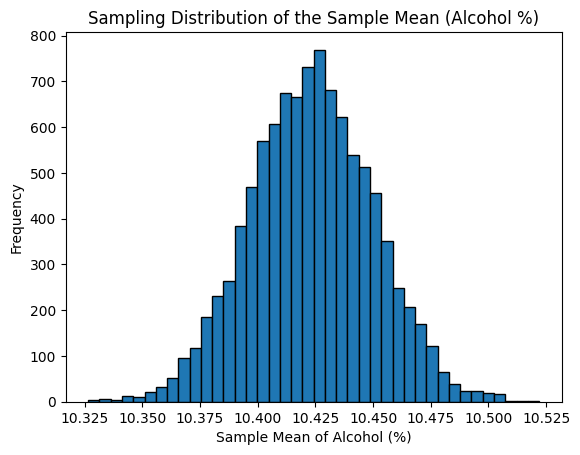

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv", sep=";")

data = df["alcohol"]

N = 10000
sample_means = []

np.random.seed(42) 

for _ in range(N):
    sample = data.sample(frac=1, replace=True)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=40, edgecolor='black')
plt.title("Sampling Distribution of the Sample Mean (Alcohol %)")
plt.xlabel("Sample Mean of Alcohol (%)")
plt.ylabel("Frequency")
plt.show()


The distribution is symmetric and is centered around the true mean of 10.425%.